In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv("purchase_history.csv")
df.head()

,user_id,product_id,created_at
0,647746,2011564,2019-02-09
1,906136,4105782,2019-11-23
2,12862997,2144063,2019-07-16
3,12097079,1207738,2019-04-05
4,3184486,4278839,2019-03-08


In [31]:
def TokenizingDateTimes():
    date_to_token = {}
    token_to_date = {}
    tknz = 1
    for year in range(2019, 2021): # years create
        for month in range(1, 13): # month create
            for day in range(1, 32): # days create
                if day<10 and month<10:
                    date_to_token[f"{year}-0{month}-0{day}"] = tknz
                    token_to_date[tknz] = f"{year}-0{month}-0{day}"
                    tknz += 1
                elif day<10 and month>=10:
                    date_to_token[f"{year}-{month}-0{day}"] = tknz
                    token_to_date[tknz] = f"{year}-{month}-0{day}"
                    tknz += 1
                elif day>=10 and month<10:
                    date_to_token[f"{year}-0{month}-{day}"] = tknz
                    token_to_date[tknz] = f"{year}-0{month}-{day}"
                    tknz += 1
                else:
                    date_to_token[f"{year}-{month}-{day}"] = tknz
                    token_to_date[tknz] = f"{year}-{month}-{day}"
                    tknz += 1
                    
    return date_to_token, token_to_date        
            
        
tokens_value, tokens_key = TokenizingDateTimes()  

In [33]:
tokens_key[10]

'2019-01-10'

In [3]:
df['created_at'] = df['created_at'].map(tokens_value)

In [4]:
# we must split any user_id and product_id
data_dict = {}
for name, value in df.groupby(by=['user_id', 'product_id']):
    data_dict[name] = sorted(list(set(value['created_at'].values)))


In [5]:
data_dict[(577243, 724112)]

[75, 87, 115, 171, 184]

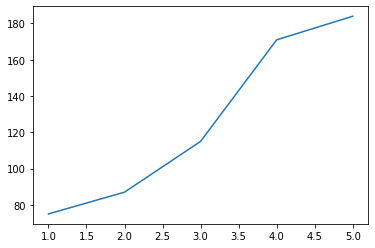

In [6]:
# first predict one value to check the accuracy
model = LinearRegression(n_jobs=10)

x_check = [i for i in range(1, len(data_dict[(577243, 724112)])+1)]
y_check = data_dict[(577243, 724112)]
plt.plot(x_check, y_check)
plt.show()

In [7]:
model.fit(np.array(x_check).reshape(-1, 1), np.array(y_check))


LinearRegression(n_jobs=10)

In [8]:
y_pred = model.predict(np.array(len(x_check)+1).reshape(-1, 1))

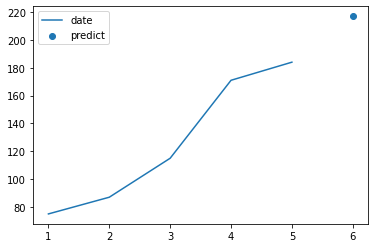

In [9]:
plt.plot(x_check, y_check, label='date')
plt.scatter(len(x_check)+1, y_pred, label='predict')
plt.legend(loc=2)
plt.show()

In [10]:
# we predict next date with simple linear model for all value
for key in data_dict.keys():
    x_train = [i for i in range(1, len(data_dict[key])+1)]
    y_train = data_dict[key]
    x_train, y_train = np.array(x_train).reshape(-1, 1), np.array(y_train)
    model.fit(x_train, y_train)
    x_forcast = np.array(len(x_train)+1).reshape(-1, 1)
    y_future = model.predict(x_forcast)
    data_dict[key].append(y_future.tolist())

In [11]:
data_dict[(577243, 724112)]

[75, 87, 115, 171, 184, [217.0]]

In [35]:
real_time = {}
for key, val in data_dict.items():
    real_time[key] = tokens_key[int(val[-1][0])]    # the last and prediction

In [37]:
# show some examlpes
real_time[(577243, 968088)], real_time[(577243, 895955)], real_time[(587491, 899050)], 

('2019-05-26', '2020-03-05', '2019-08-24')